# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo: 14__

__Nombres de los estudiantes: Javier Fernández Parrondo y Carlos Murcia Morilla__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("mobile_phones.csv")

df["price_range"] = df["price_range"].astype("category")

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
clf = DecisionTreeClassifier(random_state=83)
clf = clf.fit(df, df['price_range'])

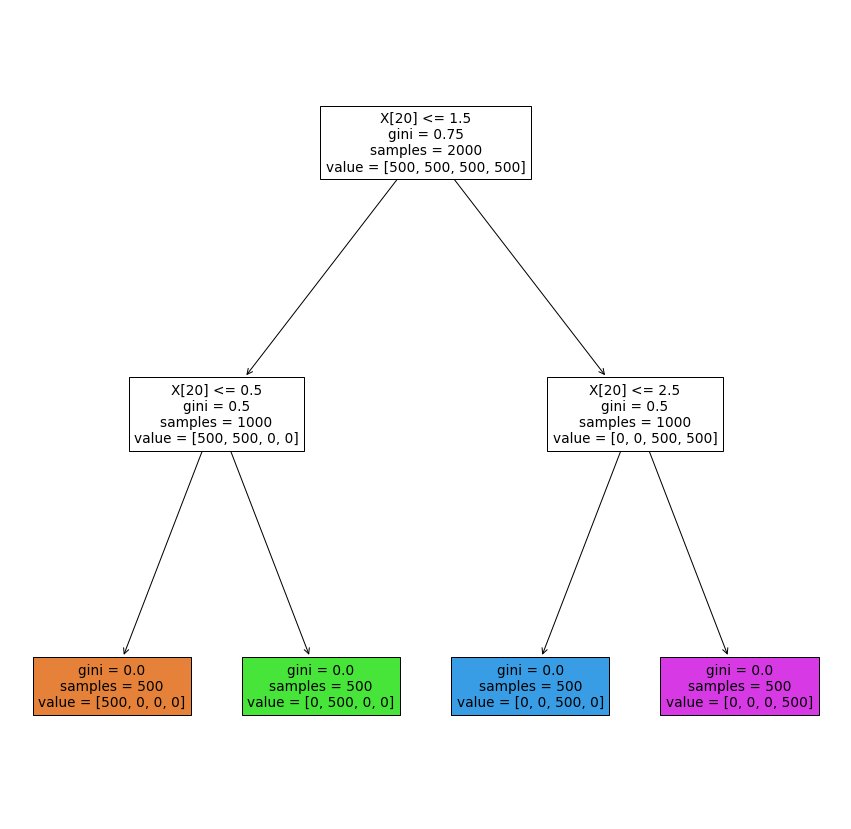

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(clf, filled=True)
plt.show()


In [ ]:
""" La clase price_range está bien equilibrada porque hay 500 datos para cada valor posible de la variable, no habiendo 
ninguna minoritaria o dominate. si estuviese desequilibrada la predicción sería más complicada sobre todo en las clases
minoritarias, ya que el conjunto de entrenamiento tendrá más clases de otro tipos y tenderá a predecir las otras clases. """

In [22]:
correl=df.corr()
correl['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [31]:
corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
""" Las variables con mayor correlación con price_range son battery_power, pixel_height, pixel_width y ram siendo está última
fuertemente correlacionada con el precio, lo cual nos hace ver que lo que más influye en el precio del móvil es la ram del mismo
y luego tiene cierta relación con su batería y la resolución de la pantalla del mismo. """

<AxesSubplot:xlabel='battery_power', ylabel='ram'>

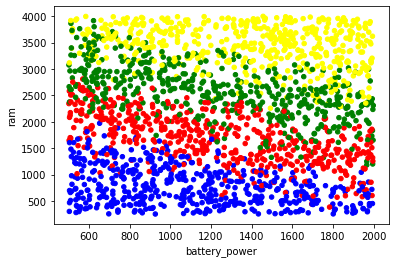

In [4]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='battery_power', y='ram', c=colors)

<AxesSubplot:xlabel='battery_power', ylabel='px_height'>

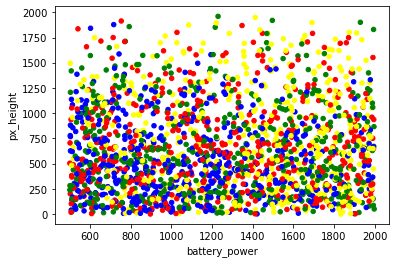

In [55]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='battery_power', y='px_height', c=colors)

<AxesSubplot:xlabel='battery_power', ylabel='px_width'>

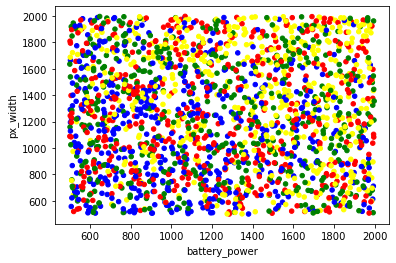

In [56]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='battery_power', y='px_width', c=colors)

<AxesSubplot:xlabel='px_height', ylabel='ram'>

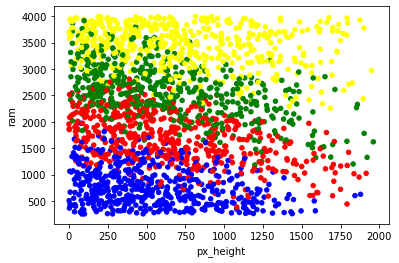

In [57]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='px_height', y='ram', c=colors)

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

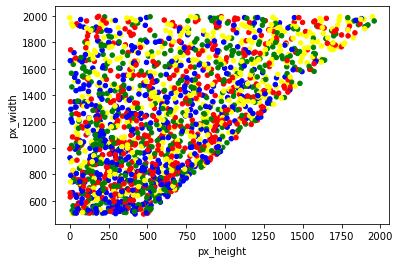

In [58]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='px_height', y='px_width', c=colors)

<AxesSubplot:xlabel='px_width', ylabel='ram'>

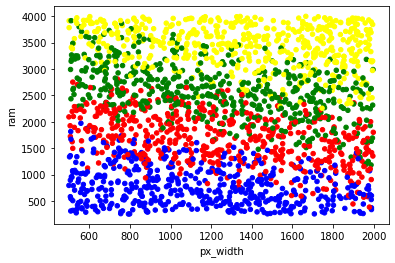

In [59]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}
colors = df['price_range'].map(dic_colors)

df.plot.scatter(x='px_width', y='ram', c=colors)

In [ ]:
""" El diagrama de dispersión más relevante es el de battery_power con la ram como era de esperar al ser las variables más 
correlacionadas con el precio, sobretodo por la ram, notamos un aumento de precio cuando aumentan los valores de estas variables.
Sigue siendo notorio en los diagramas de ram con width y height pero debido sobretodo al valor de ram. Probablemente sea un 
problema sencillo ya que depende casi por completo de la variable ram por lo que hemos podido observar y podemos trabajar con
ella para predecir los rangos de precio fácilmente. """

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

In [ ]:
""" Como vamos a utilizar árboles de decisión no sería necesario reescalar los datos, debido a que los árboles de decisión
se rigen por unas reglas en las que comparan los datos por si uno es mayor que el otro independientemente de si aumentan o
disminuyen de forma proporcional. """

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [9]:
df2 = df.copy()
df2.drop('price_range', inplace=True, axis=1)
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [37]:
train_accuracy = []
test_accuracy = []

max_depths = range(1, 15)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=83)
    scores = cross_validate(clf, df2, df['price_range'], scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.5,
  0.7638333333333334,
  0.7649999999999999,
  0.8155555555555555,
  0.8753333333333334,
  0.9132222222222222,
  0.9522222222222222,
  0.9810000000000001,
  0.9937777777777776,
  0.9987222222222222,
  0.9998888888888888,
  1.0,
  1.0,
  1.0],
 [0.5,
  0.758,
  0.756,
  0.7830000000000001,
  0.834,
  0.85,
  0.8554999999999999,
  0.8504999999999999,
  0.857,
  0.8504999999999999,
  0.8470000000000001,
  0.849,
  0.849,
  0.849])

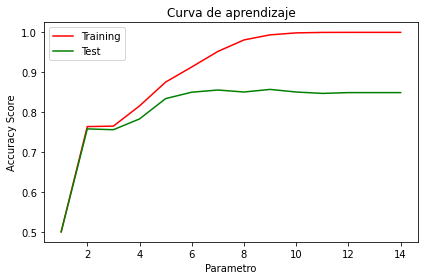

In [38]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [ ]:
""" Vemos que hasta el parámetro 2 crecen rápidamente tanto la puntuación de test como la de entrenamiento, luego en el 7 
y el 9 alcanza los mejores puntos de aprendizaje, siendo que a partir del 9 empieza a sobreaprender sin mejorar la puntuación
de aprendizaje. A partir del 5 la curva de aprendizaje se normaliza mientras que la de entrenamiento sigue aumentando 
considerablemente por lo que hemos decidido utilizar el parámetro 5 ya que para un aprendizaje alto del que tampoco se mejora
en gran medida para los parámetros 7 y 9 necesita entrenar bastante menos que en estos mismos. """

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

In [45]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=5, random_state=83)
clf2 = clf2.fit(df2, df.price_range)

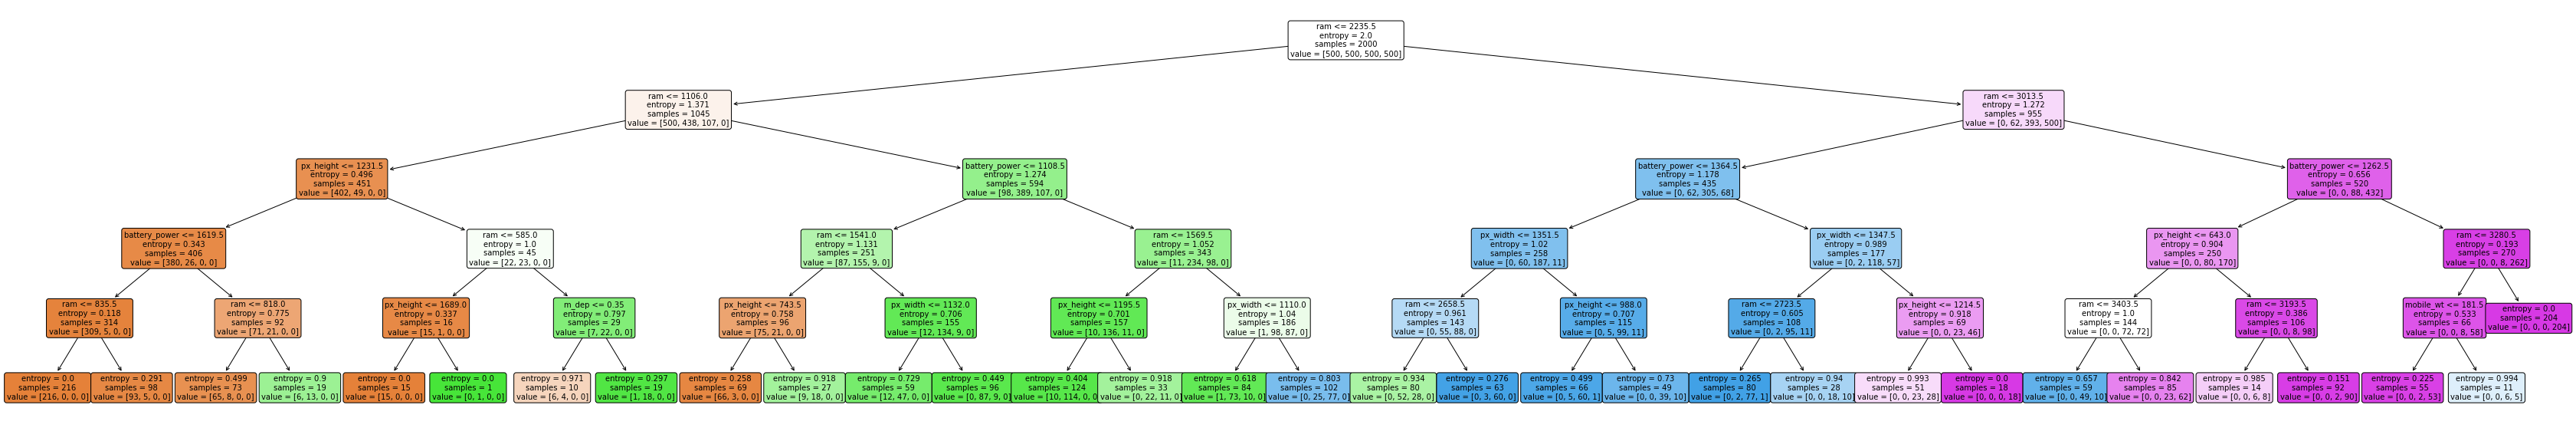

In [85]:
#Abrir imagen en nueva pestaña para ver los datos correctamente
plt.figure(figsize=(60,10))
plot_tree(clf2, feature_names = df.keys(), filled=True, rounded=True, fontsize = 10)
plt.show()

In [92]:
for name, importance in zip(df2.keys(), clf2.feature_importances_):
    print(name + ': ' + str(importance))

battery_power: 0.08932744510505311
blue: 0.0
clock_speed: 0.0
dual_sim: 0.0
fc: 0.0
four_g: 0.0
int_memory: 0.0
m_dep: 0.0024721689768892868
mobile_wt: 0.0037707813276345145
n_cores: 0.0
pc: 0.0
px_height: 0.05444701498537073
px_width: 0.05538514857714611
ram: 0.7945974410279062
sc_h: 0.0
sc_w: 0.0
talk_time: 0.0
three_g: 0.0
touch_screen: 0.0
wifi: 0.0


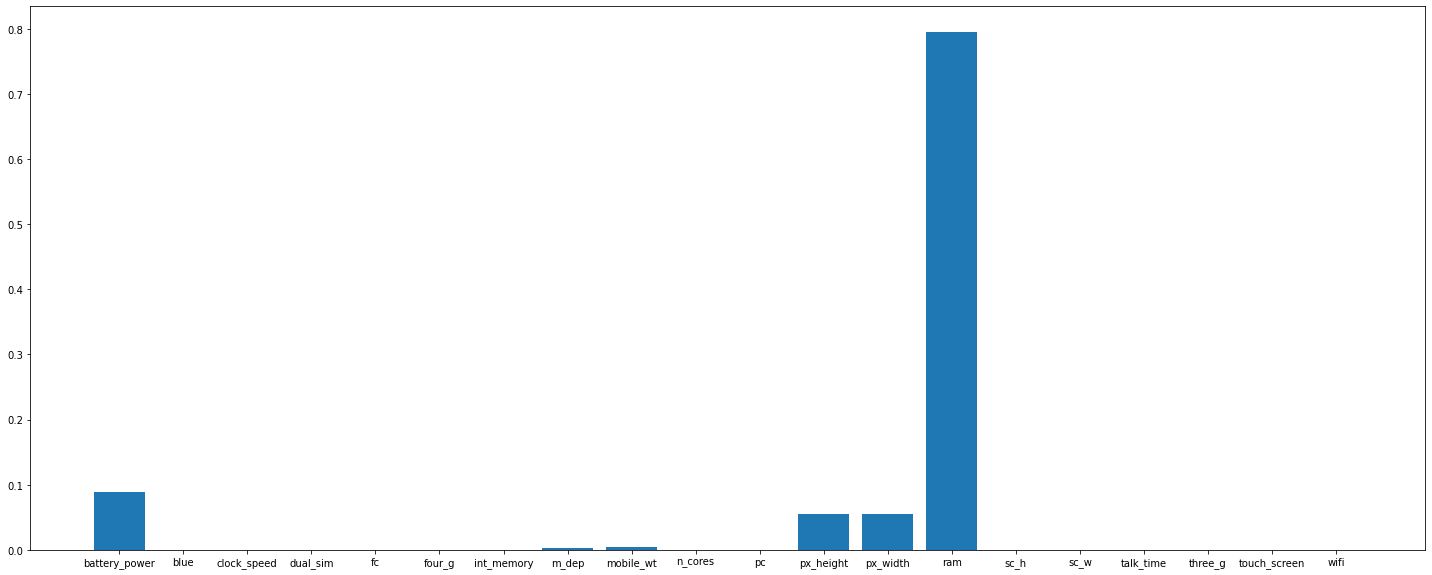

In [102]:
plt.figure(figsize=(25,10))
plt.bar(df2.keys(), clf2.feature_importances_)
plt.show()

In [ ]:
""" 1: Las variables más importantes son, en orden: ram, battery_power, px_width y px_height. El resto son despreciables o nulas.
    2: No se han usado ni blue, clock_peed, dual_sim, fc, four_g, int_memory, n_cores, pc, sc, sc_h, sc_w, talk_time, three_g,
    touch_screen ni wifi. 
    3: Para un solo paso del árbol en la clase 0 y 3 hay un 100% de acierto mientras que en la 1 es un 87.6% y en la 2 es de un 
    78.6% 
    4: Si
    5: Las clases que mejor se separan son la 0 y la 3, mientras que la que peor parece separarse es la 2, siendo ram y battery
    las variables que mejor ayudan a separarlas.
    6: En el nodo que pregunta por (battery_power <= 1108.5) """

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [112]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=83)
predictions = cross_val_predict(clf2, df2, df['price_range'], cv=10)

In [113]:
predictions

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[447  53   0   0]
 [ 42 424  34   0]
 [  0  79 353  68]
 [  0   0  56 444]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

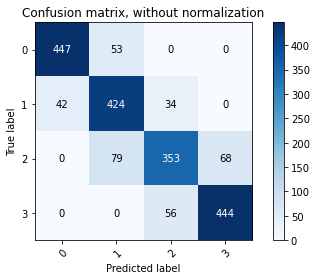

In [116]:
plot_confusion_matrix(df['price_range'], predictions,['0', '1', '2', '3'], normalize=False)

In [ ]:
""" Clave 0: exhaustividad = 0.914, precision = 0.894 y F1 = 0.903
    Clave 1: exhaustividad = 0.762, precision = 0.848 y F1 = 0.803
    Clave 2: exhaustividad = 0.797, precision = 0.706 y F1 = 0.748
    Clave 3: exhaustividad = 0.867, precision = 0.888 y F1 = 0.877
    
    Con estos datos que hemos obtenido podemos afirmar que para moviles
    muy baratos o muy caros es bastante fiable, aunque no sería óptimo utilizar
    este árbol de decisiones para una empresa ya que de media tiene una 
    precision del 0.834 lo cual no es del todo fiable ya que buscaríamos algo
    superior al 0.9. """

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
